In [3]:
subjects = {"SF1", "SF2", "SF3" , "SF4" , "SF5" , "SF6" , "SF7" , "SF8", ...
            "SF11", "SF12", "SF13", "SF14", "SF15", "SF16", "SF17", "SF19", "SF21", "SF22", "SF23"};
RFO = [];
path = '/Volumes/ritd-ag-project-rd00k9-tmaki67/';
days = [1, 2, 3, 4, 5];

### Read in data

In [6]:
for s = 1:length(subjects)
    for d = 1:5
            temp = load([path subjects{s}{1} '/Random Finger Opposition/' subjects{s}{1} '_D' num2str(d) '.mat'], "Hits");
            RFO(d,:,s) = temp.Hits;
            DayAv(d,s) = mean(RFO(d,:,s));
    end
end

### Average Num of Hits Per Day

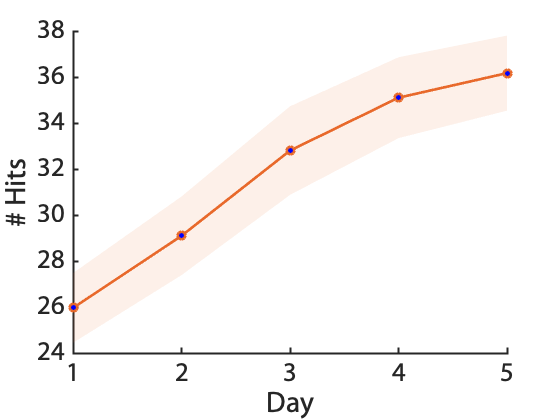

In [16]:
figure()
[l,p] = boundedline(days, mean(DayAv,2), std(DayAv')/sqrt(length(subjects)), '-ro', 'cmap', [0.9100,0.4100,0.1700], 'alpha', 'transparency', 0.1);
l.LineWidth = 2;
l.MarkerFaceColor = [0.9100,0.4100,0.1700];
xticks(days);
ax = gca;
ax.FontSize = 20; 
xlabel('Day','FontSize',22)
ylabel('# Hits','FontSize',22)
set(gca, 'FontName', 'Myriad Pro')
set(gca,'linewidth',1.5)
% errorbar(mean(DayAv,2),std(DayAv')/sqrt(length(subjects)))
% xlim([0,6])
saveas(gca,"RFO.svg")

### Individual Participants Num of Hits Per Day

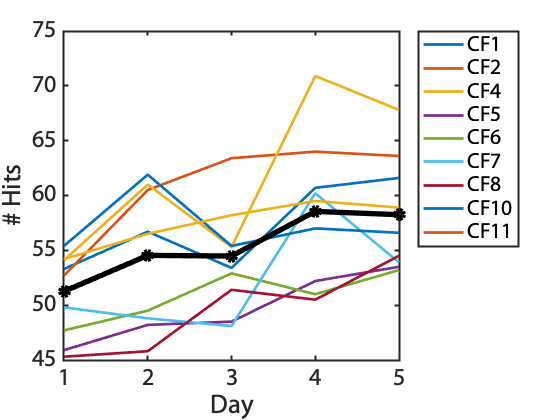

In [12]:
figure()
plot(DayAv, 'LineWidth', 2)
hold on
plot(mean(DayAv,2), '-ko', 'LineWidth', 4)
xticks(days);
ax = gca;
ax.FontSize = 18; 
xlabel('Day','FontSize', 20)
ylabel('# Hits','FontSize', 20)
set(gca, 'FontName', 'Myriad Pro')
set(gca,'linewidth', 1.5)
legend(subjects,'Location','bestoutside')

### Average Score Per Trial

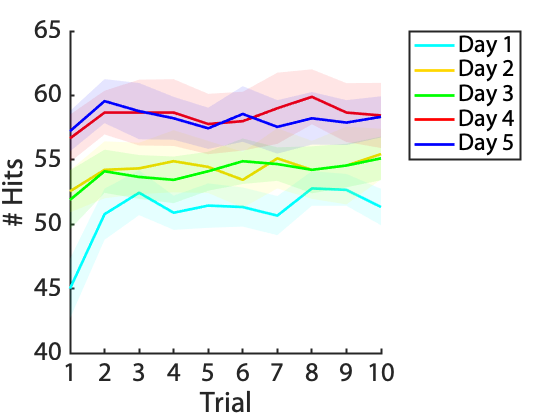

In [13]:
TrialAv = mean(RFO, 3);
for d = 1:5
    for t = 1:10
        TrialSE(d,t) = std(RFO(d,t,:))/sqrt(length(subjects));
    end
end

figure()
[l1,p] = boundedline([1:10], TrialAv(1,:), TrialSE(1,:), 'c', 'alpha', 'transparency', 0.1);
l1.LineWidth = 2;
hold on
[l2,p] = boundedline([1:10], TrialAv(2,:), TrialSE(2,:), 'y', 'alpha', 'transparency', 0.1);
l2.LineWidth = 2;
set(l2, 'Color', [255/255 215/255 0])
[l3,p] = boundedline([1:10], TrialAv(3,:), TrialSE(3,:), 'g', 'alpha', 'transparency', 0.1);
l3.LineWidth = 2;
[l4,p] = boundedline([1:10], TrialAv(4,:), TrialSE(4,:), 'r', 'alpha', 'transparency' ,0.1);
l4.LineWidth = 2;
[l5,p] = boundedline([1:10], TrialAv(5,:), TrialSE(5,:), 'b', 'alpha', 'transparency', 0.1);
l5.LineWidth = 2;
xticks([1 2 3 4 5 6 7 8 9 10]);
ax = gca;
ax.FontSize = 20; 
xlabel('Trial', 'FontSize', 22)
ylabel('# Hits', 'FontSize', 22)
set(gca, 'FontName', 'Myriad Pro')
set(gca, 'linewidth', 1.5)
% errorbar(TrialAv(1,:), TrialSE(1,:));
% hold on
% for d = 2:5
%     errorbar(TrialAv(d,:),TrialSE(d,:));
% end
legend([l1 l2 l3 l4 l5], 'Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Location', 'bestoutside')
xlim([1 10]);
% xlim([0,11]) 

### Average Percentage Improvement

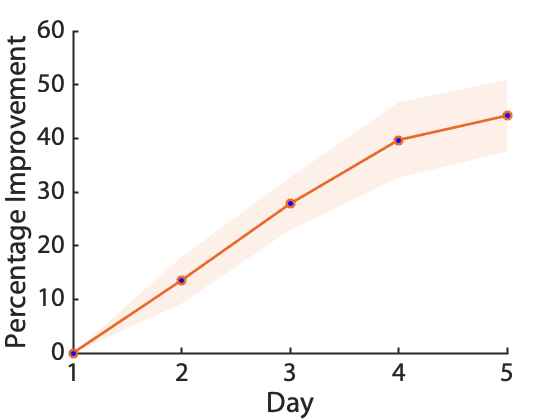

In [21]:
percentageImprov = zeros(size(DayAv'));

for i = 2:5
     percentageImprov(:,i) = (DayAv(i,:)'-DayAv(1,:)')./DayAv(1,:)'*100;
end

figure()
[l,p] = boundedline(days, mean(percentageImprov), std(percentageImprov)/sqrt(length(subjects)), '-o', 'cmap', [0.9100,0.4100,0.1700], 'alpha', 'transparency', 0.1);
l.LineWidth = 2;
l.MarkerFaceColor = [0 0 1];
xticks(days);
ax = gca;
ax.FontSize = 20; 
xlabel('Day', 'FontSize', 22)
ylabel('Percentage Improvement', 'FontSize', 22)
set(gca, 'FontName', 'Myriad Pro')
set(gca, 'linewidth', 1.5)

### Individual Subjects Percentage Improvement

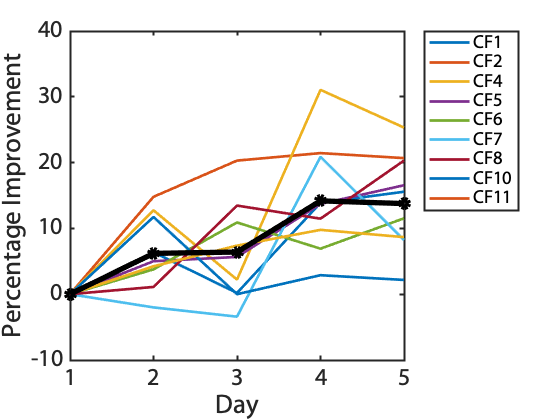

In [15]:
figure()
plot(percentageImprov', 'LineWidth', 2)
hold on
plot(mean(percentageImprov',2), '-ko', 'LineWidth', 4)
xticks(days);
ax = gca;
ax.FontSize = 18; 
xlabel('Day', 'FontSize',20)
ylabel('Percentage Improvement', 'FontSize',20)
set(gca, 'FontName', 'Myriad Pro')
set(gca, 'linewidth', 1.5)
legend(subjects, 'Location', 'bestoutside', 'FontSize', 14)